<a href="https://colab.research.google.com/github/ShamsuriIkhwan/plant-deep-learning/blob/main/augmented_224_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving New folder.zip to New folder.zip
User uploaded file "New folder.zip" with length 9067749 bytes


In [2]:
#!unzip "/content/drive/path/input_file_name.zip" -d "/content/drive/path/output_folder/"
!unzip "/content/New folder.zip" -d "/content/dataset"

Archive:  /content/New folder.zip
   creating: /content/dataset/224/
   creating: /content/dataset/224/Durian_diseased/
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (1).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (10).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (100).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (11).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (12).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (13).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (14).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (15).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (16).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (17).jpg  
  inflating: /content/dataset/224/Durian_diseased/Durian_diseased (18).jpg  
  inflating: /content/dataset/224

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [4]:
# Set the path to the original dataset folder
dir = '/content/dataset/224'

# Set the path to the augmented dataset folder
aug_dir = '/content/aug_dataset_224'


# Print the class names and the number of samples before augmentation
#227
for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        print(f"Class: {class_name}, Samples: {num_samples}")

num_dir_classes=len(os.listdir(dir))
print("\n","There are", num_dir_classes, "classes in the folder\n")

Class: Durian_diseased, Samples: 100
Class: Mango_healthy, Samples: 100
Class: Rambutan_healthy, Samples: 100
Class: Guava_healthy, Samples: 100
Class: Rambutan_diseased, Samples: 100
Class: Guava_diseased, Samples: 100
Class: Durian_healthy, Samples: 100
Class: Mango_diseased, Samples: 100

 There are 8 classes in the folder



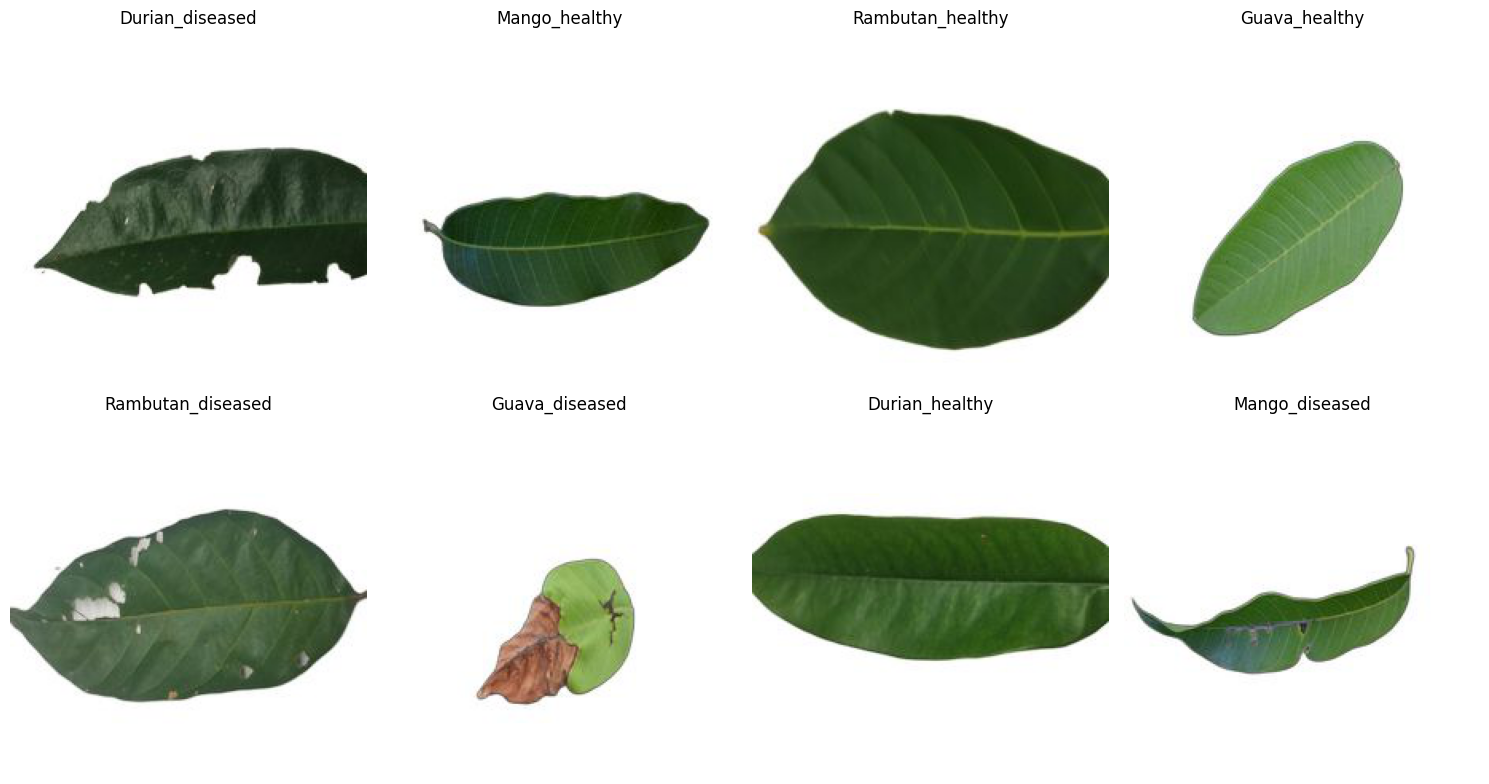

In [5]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the class names
for i, class_name in enumerate(os.listdir(dir)):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        # Randomly select an image from the class
        selected_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, selected_image_file)
        image = plt.imread(image_path)

        # Plot the image in the corresponding subplot
        axes[i].imshow(image)
        axes[i].set_title(class_name)
        axes[i].axis('off')

plt.tight_layout()
plt.show()


In [6]:
import os
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("For 224 dataset augmentation\n")

# Define the types of augmentations
augmentation_types = {
    'rotation': 45,
    'width_shift': 0.1,
    'height_shift': 0.1,
    'shear': 0.2,
    'zoom': 0.2,
    'horizontal_flip': True
}

# Perform data augmentation for each class
datagen = ImageDataGenerator(
    rotation_range=augmentation_types['rotation'],
    width_shift_range=augmentation_types['width_shift'],
    height_shift_range=augmentation_types['height_shift'],
    shear_range=augmentation_types['shear'],
    zoom_range=augmentation_types['zoom'],
    horizontal_flip=augmentation_types['horizontal_flip'],
    fill_mode='nearest'
)

# Iterate over the classes in the original dataset
for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        num_samples = len(class_images)

        # Create a directory for the current class in the augmented dataset folder
        aug_class_dir = os.path.join(aug_dir, class_name)
        os.makedirs(aug_class_dir, exist_ok=True)

        # Copy original images to the augmented dataset folder
        for image_name in class_images:
            original_image_path = os.path.join(class_path, image_name)
            target_image_path = os.path.join(aug_class_dir, image_name)
            copyfile(original_image_path, target_image_path)

            # Apply data augmentation and save augmented images
            img = tf.keras.preprocessing.image.load_img(original_image_path)
            x = tf.keras.preprocessing.image.img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i = 0
            for batch in datagen.flow(x, batch_size=16,
                                      save_to_dir=aug_class_dir,
                                      save_prefix='aug_' + class_name + '_',
                                      save_format='jpg'):
                i += 1
                if i > 20:
                    break


For 224 dataset augmentation



In [7]:
# Print the class names and the number of samples after augmentation
for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        print(f"Class: {class_name}, Samples: {num_samples}")

num_classes = len(os.listdir(aug_dir))
print("There are", num_classes, "classes in the folder")

Class: Durian_diseased, Samples: 1985
Class: Mango_healthy, Samples: 2016
Class: Rambutan_healthy, Samples: 2000
Class: Guava_healthy, Samples: 1990
Class: Rambutan_diseased, Samples: 2001
Class: Guava_diseased, Samples: 2019
Class: Durian_healthy, Samples: 2016
Class: Mango_diseased, Samples: 1999
There are 8 classes in the folder


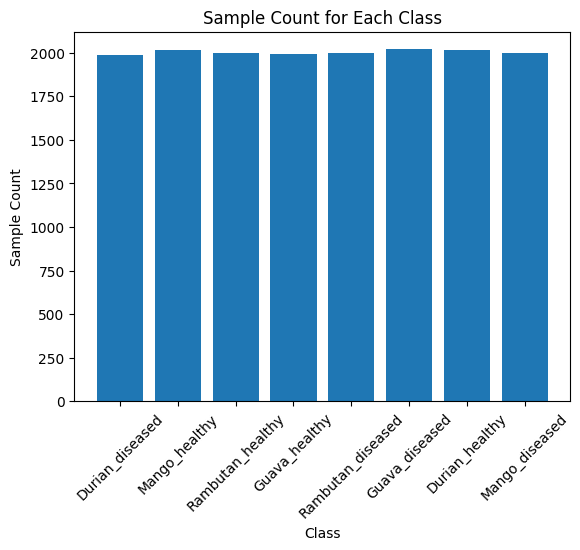

In [8]:
class_counts = []
class_labels = []

for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    file_count = len(os.listdir(class_path))
    class_counts.append(file_count)
    class_labels.append(class_name)

plt.bar(class_labels, class_counts)
plt.title('Sample Count for Each Class')
plt.xlabel('Class')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Set the path to the folder for the split dataset
split_dir = '/content/split_dataset_224'
os.makedirs(split_dir, exist_ok=True)

# Set the desired split ratios (e.g., 70% train, 15% validation, 15% test)
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Iterate over the class names
for class_name in os.listdir(aug_dir):
    class_path = os.path.join(aug_dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        # Split the image files into train, validation, and test sets
        train_files, val_test_files = train_test_split(image_files, test_size=val_ratio + test_ratio, random_state=42)
        val_files, test_files = train_test_split(val_test_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

        # Create directories for the train, validation, and test sets
        train_dir = os.path.join(split_dir, 'train', class_name)
        val_dir = os.path.join(split_dir, 'valid', class_name)
        test_dir = os.path.join(split_dir, 'test', class_name)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        # Move the images to the respective directories
        for file in train_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(train_dir, file)
            shutil.copy(src_path, dst_path)

        for file in val_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(val_dir, file)
            shutil.copy(src_path, dst_path)

        for file in test_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(test_dir, file)
            shutil.copy(src_path, dst_path)


In [10]:
# Define the directory names for train, validation, and test sets
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'valid')
test_dir = os.path.join(split_dir, 'test')

# Count the number of samples in each directory
train_samples = sum(len(files) for _, _, files in os.walk(train_dir))
val_samples = sum(len(files) for _, _, files in os.walk(val_dir))
test_samples = sum(len(files) for _, _, files in os.walk(test_dir))

# Print the number of samples in each directory
print(f"Train samples: {train_samples}")
print(f"Validation samples: {val_samples}")
print(f"Test samples: {test_samples}")

Train samples: 11214
Validation samples: 3205
Test samples: 1607


In [13]:
#!zip -r "/content/drive/path/output_file_name.zip" "/content/drive/My Drive/filepathtozip"
!zip -r "/content/aug_dataset_224.zip" "/content/aug_dataset_224"
!zip -r "/content/split_dataset_224.zip" "/content/split_dataset_224"

Streaming output truncated to the last 5000 lines.
  adding: content/split_dataset_224/train/Guava_diseased/aug_Guava_diseased__0_4467.jpg (deflated 20%)
  adding: content/split_dataset_224/train/Guava_diseased/aug_Guava_diseased__0_191.jpg (deflated 29%)
  adding: content/split_dataset_224/train/Guava_diseased/Guava_diseased (7).jpg (deflated 26%)
  adding: content/split_dataset_224/train/Guava_diseased/aug_Guava_diseased__0_3296.jpg (deflated 13%)
  adding: content/split_dataset_224/train/Guava_diseased/aug_Guava_diseased__0_1830.jpg (deflated 14%)
  adding: content/split_dataset_224/train/Guava_diseased/aug_Guava_diseased__0_5899.jpg (deflated 11%)
  adding: content/split_dataset_224/train/Guava_diseased/aug_Guava_diseased__0_6253.jpg (deflated 15%)
  adding: content/split_dataset_224/train/Guava_diseased/aug_Guava_diseased__0_4362.jpg (deflated 8%)
  adding: content/split_dataset_224/train/Guava_diseased/aug_Guava_diseased__0_3690.jpg (deflated 23%)
  adding: content/split_dataset_

In [14]:
from google.colab import files
#files.download("/content/file.zip")
files.download("/content/aug_dataset_224.zip")
files.download("/content/split_dataset_224.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r "/content/aug_dataset_224" "/content/drive/MyDrive/aug_FYP dataset_224"
!cp -r "/content/split_dataset_224" "/content/drive/MyDrive/split_dataset_224"